In [2]:
%matplotlib inline
import pandas as pd

census = pd.read_csv('~/Downloads/acs2015_county_data.csv')
census.describe()

,CensusId,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
count,3220.000000,3.220000e+03,3.220000e+03,3.220000e+03,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,...,3220.000000,3220.000000,3220.000000,3220.000000,3.220000e+03,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000
mean,31393.605280,9.940935e+04,4.889694e+04,5.051241e+04,11.011522,75.428789,8.665497,1.723509,1.229068,0.082733,...,3.323509,1.612733,4.631770,23.278758,4.559352e+04,74.219348,17.560870,7.931801,0.288106,8.094441
std,16292.078954,3.193055e+05,1.566813e+05,1.626620e+05,19.241380,22.932890,14.279122,7.253115,2.633079,0.734931,...,3.756096,1.670988,3.178772,5.600466,1.496995e+05,7.863188,6.510354,3.914974,0.455137,4.096114
min,1001.000000,8.500000e+01,4.200000e+01,4.300000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,4.900000,6.200000e+01,25.000000,5.800000,0.000000,0.000000,0.000000
25%,19032.500000,1.121800e+04,5.637250e+03,5.572000e+03,1.900000,64.100000,0.500000,0.100000,0.200000,0.000000,...,1.400000,0.900000,2.700000,19.500000,4.550750e+03,70.500000,13.100000,5.400000,0.100000,5.500000
50%,30024.000000,2.603500e+04,1.293200e+04,1.305700e+04,3.900000,84.100000,1.900000,0.300000,0.500000,0.000000,...,2.400000,1.300000,3.900000,23.000000,1.050800e+04,75.700000,16.200000,6.900000,0.200000,7.600000
75%,46105.500000,6.643050e+04,3.299275e+04,3.348750e+04,9.825000,93.200000,9.600000,0.600000,1.200000,0.000000,...,4.000000,1.900000,5.600000,26.800000,2.863275e+04,79.700000,20.500000,9.400000,0.300000,9.900000
max,72153.000000,1.003839e+07,4.945351e+06,5.093037e+06,99.900000,99.800000,85.900000,92.100000,41.600000,35.300000,...,71.200000,39.100000,37.200000,44.000000,4.635465e+06,88.300000,66.200000,36.600000,9.800000,36.500000


In [4]:
census.isnull().sum(axis = 0)
census_missing = census.dropna()


In [7]:
census_columns = [col for col in census.columns.values if col not in ['CensusId', 'State', 'County']]
census_columns


['TotalPop',
 'Men',
 'Women',
 'Hispanic',
 'White',
 'Black',
 'Native',
 'Asian',
 'Pacific',
 'Citizen',
 'Income',
 'IncomeErr',
 'IncomePerCap',
 'IncomePerCapErr',
 'Poverty',
 'ChildPoverty',
 'Professional',
 'Service',
 'Office',
 'Construction',
 'Production',
 'Drive',
 'Carpool',
 'Transit',
 'Walk',
 'OtherTransp',
 'WorkAtHome',
 'MeanCommute',
 'Employed',
 'PrivateWork',
 'PublicWork',
 'SelfEmployed',
 'FamilyWork',
 'Unemployment']

In [9]:
from sklearn.cluster import KMeans

K = 4
kmeans = KMeans(n_clusters=K)
census_clusters = kmeans.fit(census_missing[census_columns])
census_clusters.cluster_centers_.shape

(4, 34)

In [10]:
census_missing['Cluster'] = census_clusters.fit_predict(census_missing[census_columns])


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [11]:
census_missing.head()

,CensusId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment,Cluster
0,1001,Alabama,Autauga,55221,26745,28476,2.6,75.8,18.5,0.4,...,1.3,1.8,26.5,23986,73.6,20.9,5.5,0.0,7.6,0
1,1003,Alabama,Baldwin,195121,95314,99807,4.5,83.1,9.5,0.6,...,1.4,3.9,26.4,85953,81.5,12.3,5.8,0.4,7.5,0
2,1005,Alabama,Barbour,26932,14497,12435,4.6,46.2,46.7,0.2,...,1.5,1.6,24.1,8597,71.8,20.8,7.3,0.1,17.6,0
3,1007,Alabama,Bibb,22604,12073,10531,2.2,74.5,21.4,0.4,...,1.5,0.7,28.8,8294,76.8,16.1,6.7,0.4,8.3,0
4,1009,Alabama,Blount,57710,28512,29198,8.6,87.9,1.5,0.3,...,0.4,2.3,34.9,22189,82.0,13.5,4.2,0.4,7.7,0


In [12]:
census_missing.Cluster.value_counts()

0    3040
2     158
1      19
3       1
Name: Cluster, dtype: int64

In [16]:
for c in range(K):
    display("Cluster {}".format(c))
    display(census_missing[census_missing.Cluster == c].State.value_counts().head())


'Cluster 0'

Texas       240
Georgia     155
Virginia    130
Kentucky    119
Missouri    112
Name: State, dtype: int64

'Cluster 1'

California    5
Texas         4
New York      3
Florida       2
Illinois      1
Name: State, dtype: int64

'Cluster 2'

California      15
Florida         12
New Jersey      11
Pennsylvania     9
Texas            9
Name: State, dtype: int64

'Cluster 3'

California    1
Name: State, dtype: int64

In [17]:
census_missing.groupby(['Cluster'])['Income'].mean()

Cluster
0    45258.590132
1    58589.894737
2    61204.303797
3    56196.000000
Name: Income, dtype: float64

In [18]:
census_missing.groupby(['Cluster'])['ChildPoverty'].mean()


Cluster
0    24.410526
1    23.584211
2    19.975316
3    25.800000
Name: ChildPoverty, dtype: float64

In [19]:
census_missing.groupby(['Cluster'])['TotalPop'].mean()


Cluster
0    4.861377e+04
1    2.594971e+06
2    7.149950e+05
3    1.003839e+07
Name: TotalPop, dtype: float64

In [22]:
display(census_missing[census_missing.Cluster == 1].sort_values('Income').head())
display(census_missing[census_missing.Cluster == 0].sort_values('Income').head())

,CensusId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment,Cluster
1312,26163,Michigan,Wayne,1778969,855112,923857,5.5,49.8,39.2,0.3,...,1.5,2.8,25.1,696900,86.1,10.0,3.8,0.1,14.9,1
362,12086,Florida,Miami-Dade,2639042,1280221,1358821,65.6,15.1,16.8,0.1,...,1.9,4.3,29.9,1204871,81.9,10.2,7.7,0.2,10.0,1
1851,36047,New York,Kings,2595259,1229001,1366258,19.6,35.7,31.2,0.2,...,2.5,3.9,41.7,1167448,79.1,14.4,6.5,0.1,10.0,1
2579,48113,Texas,Dallas,2485003,1225722,1259281,39.0,31.5,21.8,0.2,...,2.1,4.1,26.5,1191958,83.9,9.5,6.4,0.1,7.6,1
2537,48029,Texas,Bexar,1825502,897690,927812,59.1,29.3,7.1,0.2,...,1.2,4.0,24.5,824123,79.6,14.8,5.6,0.1,7.4,1


,CensusId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment,Cluster
3142,72001,Puerto Rico,Adjuntas,18962,9266,9696,99.8,0.2,0.0,0.0,...,0.0,1.0,29.7,4093,63.0,28.7,8.0,0.3,36.5,0
3183,72081,Puerto Rico,Lares,28727,14187,14540,99.6,0.2,0.0,0.0,...,0.0,0.4,31.1,6205,61.5,32.2,5.6,0.7,35.2,0
3189,72093,Puerto Rico,Maricao,6315,3144,3171,99.9,0.0,0.1,0.0,...,1.3,2.6,22.1,1500,62.5,29.1,8.3,0.0,10.7,0
3161,72039,Puerto Rico,Ciales,17928,8788,9140,99.5,0.5,0.0,0.0,...,0.5,0.7,32.0,3472,58.5,35.8,5.8,0.0,17.7,0
3164,72045,Puerto Rico,Comerío,20339,10122,10217,99.8,0.1,0.0,0.0,...,3.3,0.6,37.2,4776,63.5,28.4,8.2,0.0,20.6,0


Text(0, 0.5, 'Income')

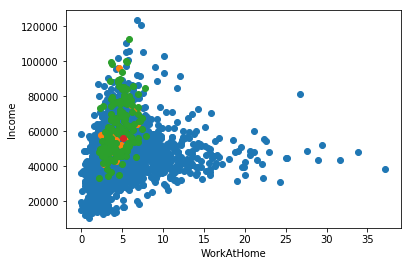

In [40]:
%matplotlib inline
import matplotlib.pyplot as plt

x, y = ("WorkAtHome","Income")

for c in range(4):
    a = census_missing[census_missing.Cluster==c][x]
    b = census_missing[census_missing.Cluster==c][y]
    plt.scatter(a,b)
    
plt.xlabel(x)
plt.ylabel(y)


(99, 2)


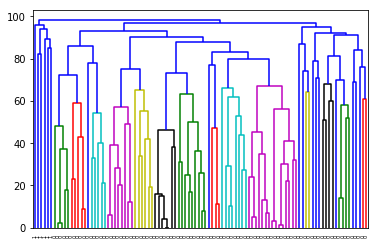

In [46]:
import numpy as np
from sklearn.cluster import AgglomerativeClustering

census_sample = census_missing[census_columns].sample(n=100)
hier_clust = AgglomerativeClustering(linkage='ward')
census_hier = hier_clust.fit(census_sample)

from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt

def plot_dendrogram(model, **kwargs):

    # Children of hierarchical clustering
    children = model.children_

    # Distances between each pair of children
    # Since we don't have this information, we can use a uniform one for plotting
    distance = np.arange(children.shape[0])

    # The number of observations contained in each cluster level
    no_of_observations = np.arange(2, children.shape[0]+2)

    # Create linkage matrix and then plot the dendrogram
    linkage_matrix = np.column_stack([children, distance, no_of_observations]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


In [50]:
census_missing['Clusters2'] = census_hier.fit_predict(census_missing[census_columns])


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [51]:
census_missing.Clusters2.value_counts()

0    3194
1      24
Name: Clusters2, dtype: int64

Text(0, 0.5, 'Income')

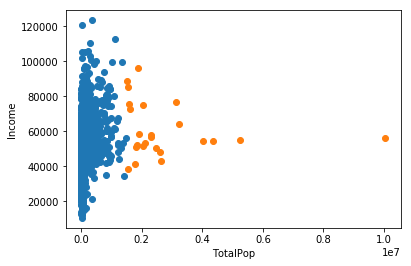

In [54]:
%matplotlib inline
import matplotlib.pyplot as plt

x, y = ("TotalPop","Income")

for c in range(2):
    a = census_missing[census_missing.Clusters2==c][x]
    b = census_missing[census_missing.Clusters2==c][y]
    plt.scatter(a,b)
    
plt.xlabel(x)
plt.ylabel(y)


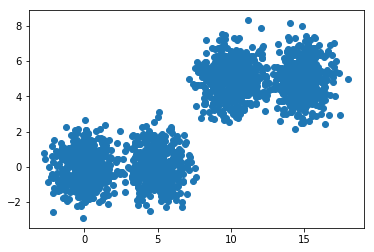

In [76]:
x = np.concatenate([np.random.randn(500), np.random.randn(500)+5, np.random.randn(500)+10, np.random.randn(500)+15])
y = np.concatenate([np.random.randn(1000), np.random.randn(1000)+5])
plt.scatter(x,y)